Import Libraries

In [347]:

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Import file

In [348]:
df = pd.read_csv('/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [350]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4324.0,2161.5,1248.375611,0.0,1080.75,2161.5,3242.25,4323.0
Unnamed: 0.1,4324.0,2161.5,1248.375611,0.0,1080.75,2161.5,3242.25,4323.0


In [351]:
df.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

Rocket having a huge amount of missing values and are greater than the half of the data

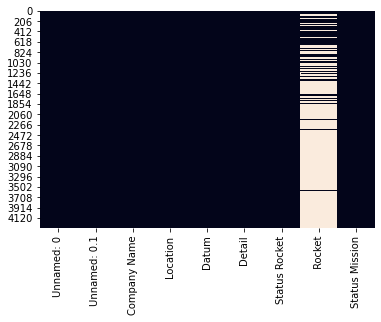

In [352]:
sns.heatmap(df.isnull(), cbar=False)

Feature Engineering and Selection

In [353]:
df['DateTime'] = pd.to_datetime(df['Datum'])

df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)

df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])

In [354]:
enc=LabelEncoder()
df['Company Name'] = enc.fit_transform(df['Company Name'])
df['Status Rocket'] = enc.fit_transform(df['Status Rocket'])
df['Country'] = enc.fit_transform(df['Country'])

In [355]:
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Datum','Location', 'Detail', 'DateTime',' Rocket'], axis = 1)

In [356]:
df

,Company Name,Status Rocket,Status Mission,Year,Country
0,46,0,Success,2020,20
1,7,0,Success,2020,3
2,46,0,Success,2020,20
3,42,0,Success,2020,10
4,48,0,Success,2020,20
...,...,...,...,...,...
4319,50,1,Failure,1958,20
4320,1,1,Success,1958,20
4321,50,1,Failure,1957,20
4322,40,1,Success,1957,10


In [357]:
X= df[['Company Name', 'Status Rocket', 'Year', 'Country']]
y= df['Status Mission']

Splitting data into test and train

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Classifier model

In [359]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

Predictions

In [360]:
prediction_rf=rf.predict(X_test)

In [361]:
rf.score(X_test, y_test)

0.9029275808936826

We have got a good score without overfitting

In [362]:
print(confusion_matrix(y_test,prediction_rf))
print('\n')
print(classification_report(y_test,prediction_rf))

[[  14    3    2   74]
 [   3    0    0   21]
 [   0    0    0    1]
 [  18    4    0 1158]]


                   precision    recall  f1-score   support

          Failure       0.40      0.15      0.22        93
  Partial Failure       0.00      0.00      0.00        24
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.92      0.98      0.95      1180

         accuracy                           0.90      1298
        macro avg       0.33      0.28      0.29      1298
     weighted avg       0.87      0.90      0.88      1298

